In [1]:
#  Steps following

# 1. Importing the packages
# 2. Load the dataset
# 3. EDA
# Display basic statistics of the numerical features
# Correlation matrix heatmap
# Pairplot for selected features
# Boxplot for SalePrice based on OverallQual
# Distribution plot for SalePrice
# 4. Feature Engineering
# 5. Split the data into training and testing sets
# 6. Define preprocessing steps
# Create a preprocessor
# 7. Choose a regression algorithm
# Create a pipeline with preprocessing and regression
# 8. Train the model
# Make predictions on the test set
# 9. Evaluate the model
# 10. Example prediction for new data

In [2]:
#  Import the packages

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset

data = pd.read_csv("C://Users//SANPULIJ//Downloads/sample_dataset.csv")
df = pd.DataFrame(data)

In [4]:
# Let's go through the columns in the given DataFrame:

# ID: An identifier or a unique number assigned to each record in the dataset.

# OverallQual: A rating or score representing the overall quality of the house. Higher values typically indicate better quality.

# GrLivArea: The total living area (in square feet) above ground level, excluding the basement.

# YearBuilt: The year the house was built.

# TotalBsmtSF: The total area of the basement in square feet.

# FullBath: The number of full bathrooms in the house.

# HalfBath: The number of half bathrooms in the house.

# GarageCars: The number of cars that can be accommodated in the garage.

# GarageArea: The total area of the garage in square feet.

# SalePrice: The sale price of the house.

# YearsOld: A feature that is created during feature engineering. It represents the age of the house by subtracting the 'YearBuilt' from the current year.

In [5]:
#  EDA

# Display basic statistics of the numerical features
print("Describing the data:\n",df.describe())
print("Info of the datafarme:\n",df.info)
print("Shape of the data",df.shape)
print("Columns in the dataframe:\n",df.columns)
print("first five rows of the dataframe:\n",df.head(5))

Describing the data:
                 ID  OverallQual    GrLivArea    YearBuilt  TotalBsmtSF  \
count  1000.000000   1000.00000  1000.000000  1000.000000  1000.000000   
mean    500.500000      5.61700  1996.309000  1960.760000  1740.401000   
std     288.819436      2.92076   883.054538    35.169351  1007.061464   
min       1.000000      1.00000   500.000000  1900.000000     0.000000   
25%     250.750000      3.00000  1223.750000  1931.000000   838.750000   
50%     500.500000      6.00000  1966.000000  1963.000000  1733.000000   
75%     750.250000      8.00000  2800.000000  1991.000000  2599.500000   
max    1000.000000     10.00000  3499.000000  2022.000000  3499.000000   

          FullBath     HalfBath   GarageCars   GarageArea      SalePrice  
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.000000  
mean      2.506000     0.994000     2.038000   484.786000  270963.885000  
std       1.135453     0.809085     1.406604   282.732658  129264.336981  
min       1

In [6]:
# Check any missing Values
df.isna().sum()

ID             0
OverallQual    0
GrLivArea      0
YearBuilt      0
TotalBsmtSF    0
FullBath       0
HalfBath       0
GarageCars     0
GarageArea     0
SalePrice      0
dtype: int64

Correlation Matrix Heatmap


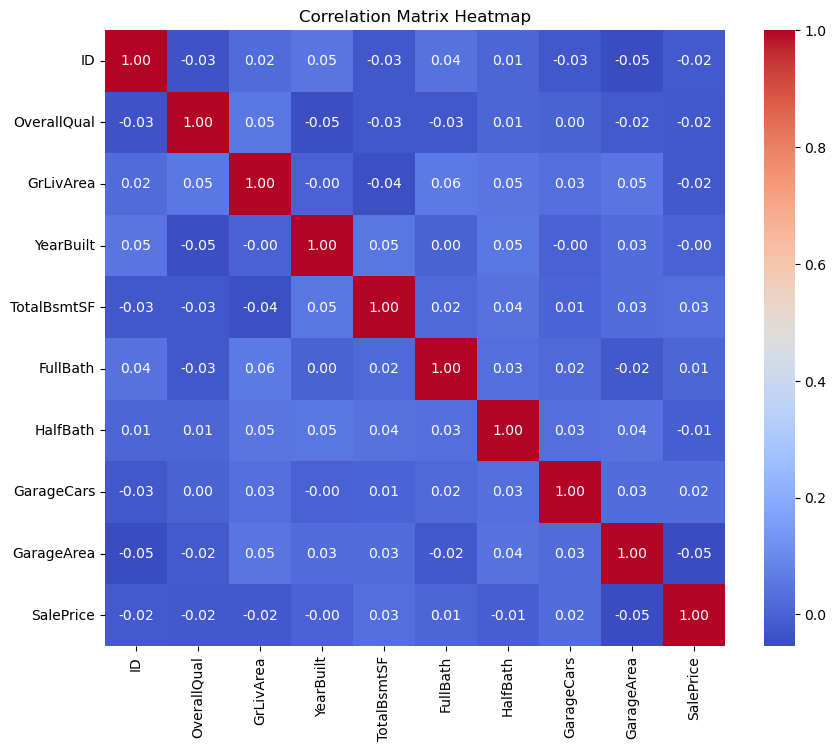

In [7]:
# Correlation matrix heatmap
print("Correlation Matrix Heatmap")
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

There was no multicolinearity problem

Pair Plot


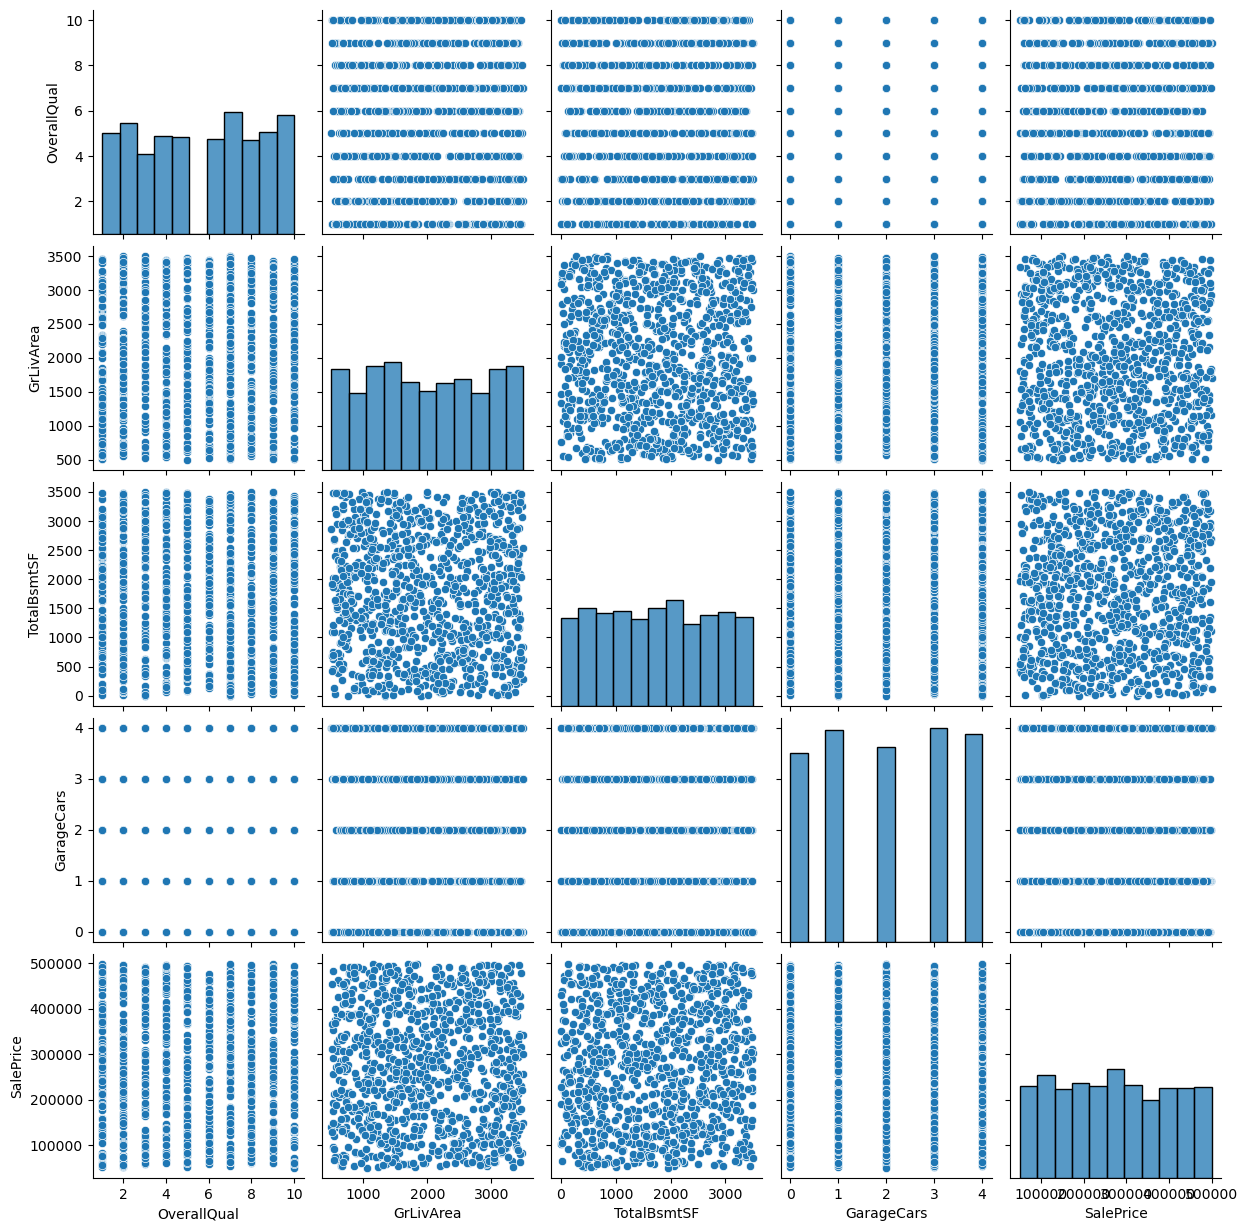

In [8]:
# Pairplot for selected features
print("Pair Plot")
sns.pairplot(df[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'SalePrice']])
plt.show()

Boxplot of SalePrice based on OverallQual


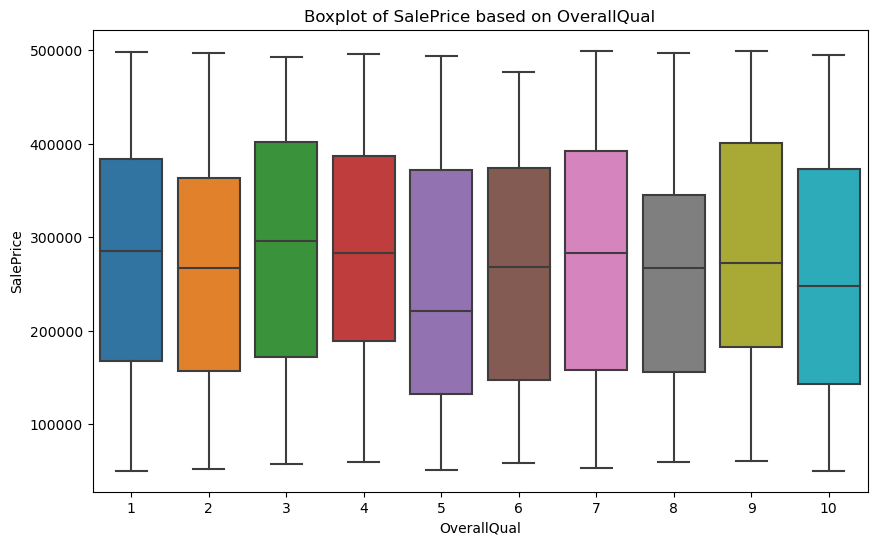

In [9]:
# Boxplot for SalePrice based on OverallQual
print("Boxplot of SalePrice based on OverallQual")
plt.figure(figsize=(10, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('Boxplot of SalePrice based on OverallQual')
plt.show()

checking any outliers

Distribution plot for SalePrice


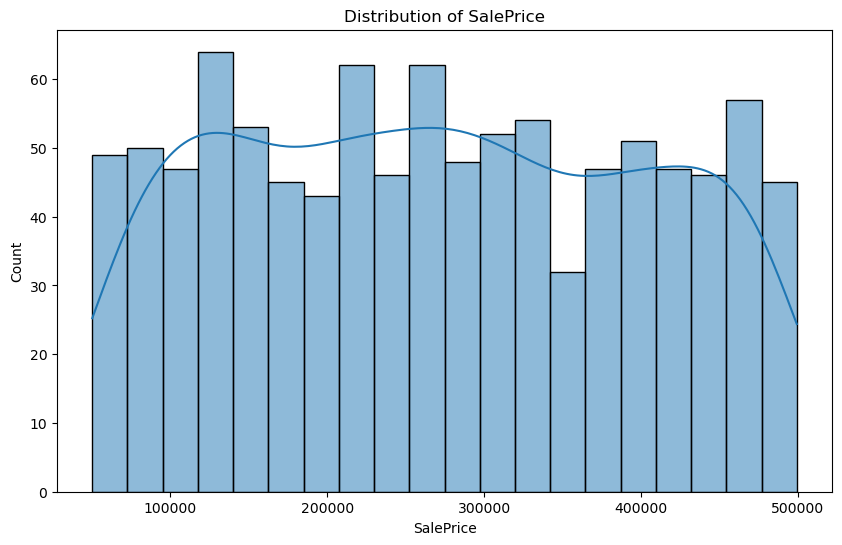

In [10]:
print("Distribution plot for SalePrice")
# Distribution plot for SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=20, kde=True)
plt.title('Distribution of SalePrice')
plt.show()

In [11]:
# Feature Engineering

df['YearsOld'] = 2023 - df['YearBuilt']

# Split the data into features and target variable
X = df.drop(['ID', 'SalePrice', 'YearBuilt'], axis=1)
y = df['SalePrice']


In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Define preprocessing steps
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = ['OverallQual']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


# Choose a regression algorithm
regressor = LinearRegression()


# Create a pipeline with preprocessing and regression
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', regressor)])

In [14]:
print("Preprocessed data:")
print(pd.DataFrame(X_train).head())

Preprocessed data:
     OverallQual  GrLivArea  TotalBsmtSF  FullBath  HalfBath  GarageCars  \
29             6       2945         3240         4         0           2   
535            2       1740          895         3         2           2   
695            4       3221         3417         4         2           1   
557            9       3340          418         4         1           0   
836            7       3188          675         2         0           1   

     GarageArea  YearsOld  
29          391       109  
535         122       121  
695         969        40  
557         449        16  
836         519        45  


In [15]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'FullBath', 'HalfBath',
       'GarageCars', 'GarageArea', 'YearsOld'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['OverallQual'])])),
                ('regressor', LinearRegression())])

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Get the number of observations (n) and number of predictors (k)
n = len(y_test)
k = X_test.shape[1]  # Assuming X is your feature matrix

# Calculate adjusted R-squared
adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print(f'Adjusted R-squared: {adjusted_r_squared}')

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Adjusted R-squared: -0.10420465149871427
Mean Squared Error: 17782193318.086823
R-squared: -0.05981451475504729


In [17]:
# Example prediction for new data
new_data = pd.DataFrame({
    'OverallQual': [5],
    'GrLivArea': [1500],
    'TotalBsmtSF': [1000],
    'FullBath': [2],
    'HalfBath': [1],
    'GarageCars': [2],
    'GarageArea': [500],
    'YearsOld': [1]
    # Add other features based on your dataset
})

new_df = pd.DataFrame(new_data)

# Use the trained model for prediction
new_prediction = model.predict(new_df)
print(f'Predicted Sale Price: {new_prediction[0]}')


Predicted Sale Price: 240755.98851242466


In [18]:
# **********************  END  *******************************